In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
df = pd.read_csv('DaNang_Infor.csv')

In [23]:
# Drop dữ liệu thiếu và reset index
df_1 = df.copy()
df_2 = df_1.dropna()
df_2 = df_2.reset_index(drop = True)
df_2

,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,HQuestions,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
0,"10 Le Lo street, My An ward My An ward, Ngu Ha...",5.0,79.0,218.0,"English, Vietnamese",Grand Sunrise Boutique Hotel,$57,$27,"$27, - ,$57",Which popular attractions are close to Grand S...,...,350,#28 of 408 hotels in Da Nang,5.0,3.0 of 5 bubbles,109.0,Excellent,80,"Charming,Business",20.0,https://www.tripadvisor.com/Hotel_Review-g2980...
1,"202 Nguyen Chi Thanh Phuoc Ninh, Hai Chau, Da ...",20.0,92.0,276.0,Vietnamese,Fivitel Boutique Da Nang,$44,$32,"$32, - ,$44",Which popular attractions are close to Fivitel...,...,364,#66 of 408 hotels in Da Nang,4.5,4.0 of 5 bubbles,174.0,Excellent,84,"Centrally Located,Great View",24.0,https://www.tripadvisor.com/Hotel_Review-g2980...
2,"155-157 Le Quang Dao Ngu Hanh Son, Da Nang 550...",8.0,74.0,270.0,"English, Vietnamese",Queen's Finger Hotel,$32,$20,"$20, - ,$32",Which popular attractions are close to Queen's...,...,377,#36 of 408 hotels in Da Nang,4.5,3.0 of 5 bubbles,165.0,Excellent,56,"Business,Family",36.0,https://www.tripadvisor.com/Hotel_Review-g2980...
3,"182 Bach Dang Street, Da Nang 550000 Vietnam",25.0,94.0,32.0,"English, Vietnamese",Haian Riverfront Hotel,100,Vietnam,"Vietnam,Da Nang,100",Which popular attractions are close to Haian R...,...,17,#130 of 408 hotels in Da Nang,5.0,4.0 of 5 bubbles,157.0,Excellent,100,Business,4.0,https://www.tripadvisor.com/Hotel_Review-g2980...
4,"39 Ha Bong, Phuoc My Ward, Son Tra District Be...",12.0,87.0,2.0,"English, Vietnamese",Green Moon Hostel,15,Vietnam,"Vietnam,Da Nang,15",Which popular attractions are close to Green M...,...,6,#52 of 133 hostels in Da Nang,4.5,2.0 of 5 bubbles,77.0,Excellent,15,"Family,Budget",2.0,https://www.tripadvisor.com/Hotel_Review-g2980...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"51 Yen Bai, Da Nang 550000 Vietnam",28.0,93.0,132.0,"English, Chinese, Japanese, Vietnamese",Dai A hotel,$18,$14,"$14, - ,$18",Which popular attractions are close to Dai A h...,...,298,#121 of 900 hotels in Da Nang,40.0,20,181.0,Very good,49,"Centrally Located,Quiet",163.0,https://www.tripadvisor.com/Hotel_Review-g2980...
146,"294 Vo Nguyen Giap My An, Ngu Hanh Son, Da Nan...",7.0,74.0,229.0,Vietnamese,Eden Hotel Danang,$65,$38,"$38, - ,$65",Which popular attractions are close to Eden Ho...,...,304,#38 of 900 hotels in Da Nang,50.0,50,132.0,Excellent,226,"Family,Great View",21.0,https://www.tripadvisor.com/Hotel_Review-g2980...
147,"192 Vo Nguyen Giap Street Phuoc My Ward, Son T...",6.0,82.0,263.0,"English, Vietnamese",The Nalod Da Nang,$145,$43,"$43, - ,$145",Which popular attractions are close to The Nal...,...,315,#54 of 900 hotels in Da Nang,45.0,35,52.0,Excellent,250,"Ocean View,Business",47.0,https://www.tripadvisor.com/Hotel_Review-g2980...
148,"50 Bach Dang Hai Chau, Da Nang 550000 Vietnam",12.0,88.0,291.0,"Korean, Vietnamese",Hilton Da Nang,$147,$88,"$88, - ,$147",Which popular attractions are close to Hilton ...,...,315,#81 of 900 hotels in Da Nang,45.0,40,74.0,Excellent,223,"River View,Centrally Located",50.0,https://www.tripadvisor.com/Hotel_Review-g2980...


In [24]:
df_2.index.names = ['STT']

In [25]:
x = []
for i in range(0, len(df_2)):
    a = i + 1
    x.append(a)
df_2.insert(0, 'Number', pd.Series(x), allow_duplicates=False)

In [26]:
df_2.describe()

,Number,HAttractions,HGFW,HImages,HRImages,HRankreview,HRestaurants,HVideos
count,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,9.620000,74.50000,160.726667,37.640000,14.353333,86.940000,24.553333
std,43.445368,16.067254,14.19507,254.016194,43.217614,17.177180,116.192171,42.559163
min,1.000000,0.000000,0.00000,1.000000,1.000000,3.000000,0.000000,1.000000
25%,38.250000,3.000000,71.00000,18.250000,10.250000,4.500000,32.250000,3.000000
50%,75.500000,7.000000,76.00000,62.500000,26.000000,4.500000,71.500000,10.000000
75%,112.750000,11.000000,84.00000,170.250000,48.750000,23.750000,126.750000,23.750000
max,150.000000,183.000000,100.00000,1378.000000,372.000000,50.000000,1319.000000,270.000000


Text(0, 0.5, 'Số khách sạn')

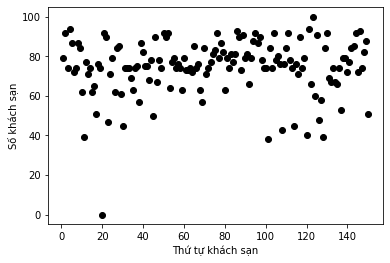

In [27]:
# Vẽ biểu đồ để thấy số lượng địa điểm có thể đi dạo
x = df_2['Number']
y = df_2['HGFW']
plt.plot(x,y,'go', color='black')
plt.xlabel('Thứ tự khách sạn')
plt.ylabel('Số khách sạn')

In [28]:
# Các biến của tập train
names = ['HAttractions', 'HImages', 'HRImages', 'HRankreview', 'HRestaurants', 'HVideos']
X_train = df_2[names]
X_train

,HAttractions,HImages,HRImages,HRankreview,HRestaurants,HVideos
STT,,,,,,
0,5.0,218.0,38.0,5.0,109.0,20.0
1,20.0,276.0,29.0,4.5,174.0,24.0
2,8.0,270.0,40.0,4.5,165.0,36.0
3,25.0,32.0,26.0,5.0,157.0,4.0
4,12.0,2.0,16.0,4.5,77.0,2.0
...,...,...,...,...,...,...
145,28.0,132.0,13.0,40.0,181.0,163.0
146,7.0,229.0,22.0,50.0,132.0,21.0
147,6.0,263.0,75.0,45.0,52.0,47.0


In [29]:
y_train= df_2['HGFW']
y_train

STT
0      79.0
1      92.0
2      74.0
3      94.0
4      87.0
       ... 
145    93.0
146    74.0
147    82.0
148    88.0
149    51.0
Name: HGFW, Length: 150, dtype: float64

In [30]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [31]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
# y = ax + b  
# a: regression coefficient
# b: intercept
# x: independent variable (input)
# y: dependent variable (outcome)

In [33]:
regressor.coef_

array([-0.04949556, -0.01803998, -0.00106349, -0.10085954, -0.00134532,
        0.03817534])

In [34]:
regressor.intercept_

78.5429834934202

In [35]:
y_predict = regressor.predict(X_train)

Text(0.5, 1.0, 'Linear Regression')

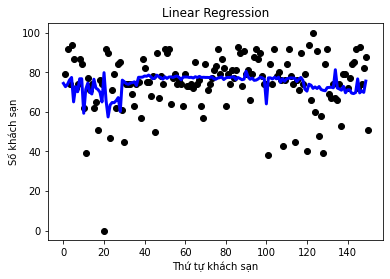

In [36]:
# Xanh là giá trị dự đoán
# Đen là giá trị thực tế
plt.scatter(x,y,  color='black')
plt.plot(y_predict, color='blue', linewidth=3)
plt.xlabel('Thứ tự khách sạn')
plt.ylabel('Số khách sạn')
plt.title('Linear Regression')

In [37]:
mse = mean_squared_error(y_train, y_predict)  # (y_predict - y_train)**2
mse  # trung bình bình phương các lỗi, số càng lớn thì lỗi càng lớn (với lỗi là sự khác nhau giữa thực tế và dự đoán)

182.00037595010315

In [38]:
r2_score(y_train, y_predict) # cần gần 1 thì 2 tập dữ liệu càng giống nhau

0.09071039710508533